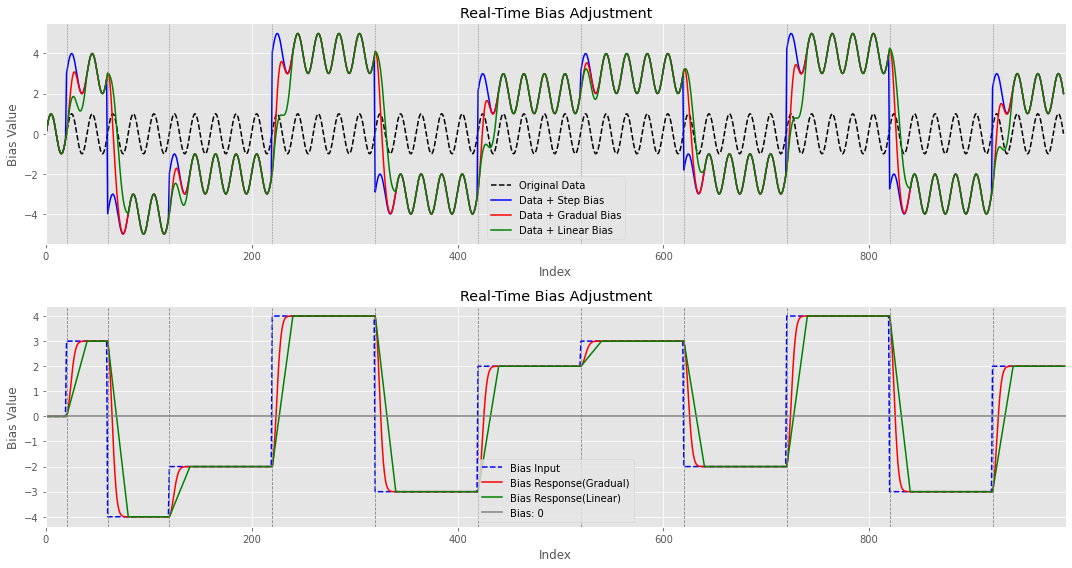

In [1]:
from apply_adjust_bias import BiasAdjustment

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

plt.style.use('ggplot')    # 'ggplot' 테마 사용

# 예제 사용
response_time = 20  # 시상수
total_length = 1000

# 예제 데이터 생성
data = np.sin(np.linspace(0, 100 * np.pi, total_length))

# 바이어스 변경 사항 정의
biases = [
    (20, 3), (60, -4), (120, -2), (220, 4), (320, -3), (420, 2),
    (520, 3), (620, -2), (720, 4), (820, -3), (920, 2),
]

# 각 인덱스에 대한 바이어스 값을 계산
bias_original = np.zeros(total_length)  # 모든 바이어스 값이 초기에는 0으로 설정
update_index_list, target_index_list = [], []
for start, value in biases:
    bias_original[start:] = value  # 시작 인덱스부터 해당 바이어스 값을 적용
    update_index_list.append(start)

# 비교용 데이터(step function이 적용된 데이터)
applied_bias_input_data = data + bias_original


# bias 계산 객체 생성
rtb_gradual = BiasAdjustment(response_time=response_time)
rtb_linear = BiasAdjustment(response_time=response_time)

applied_gradual_bias_list, applied_linear_bias_list = [], []
gradual_biases, linear_biases = [], []

# 실시간 바이어스 조정 시뮬레이션
for i in range(total_length):  # 데이터 포인트 수 증가
    # 1. 현재 인덱스의 바이어스 값 계산
    bias_input = bias_original[i]
    # 2. 두 가지 방식으로 바이어스 적용
    gradual_bias = rtb_gradual.apply_bias(i, bias_input, bias_type='gradual')
    linear_bias = rtb_linear.apply_bias(i, bias_input, bias_type='linear')
    # 3. 바이어스 적용 후 데이터 계산
    applied_gradual_bias = data[i] + gradual_bias
    applied_linear_bias = data[i] + linear_bias
    
    # 4. 그래프 업데이트를 위한 바이어스 값 저장
    gradual_biases.append(gradual_bias)
    linear_biases.append(linear_bias)
    # 5. 그래프 업데이트를 위한 데이터 저장
    applied_linear_bias_list.append(applied_linear_bias)
    applied_gradual_bias_list.append(applied_gradual_bias)
    # 6. 그래프 업데이트 (10번째 인덱스마다)
    if i % 10 == 0:  # 매 10번째 인덱스마다 그래프 업데이트
        
        fig, axes = plt.subplots(2, 1, figsize=(15, 8))
        ax1, ax2 = axes
        # 6.1. 데이터 그래프
        ax1.plot(data[: i], label='Original Data', linestyle='--', color='k')
        ax1.plot(applied_bias_input_data[: i], label='Data + Step Bias', linestyle='-', color='blue')
        ax1.plot(applied_gradual_bias_list[: i], label='Data + Gradual Bias', linestyle='-', color='r')
        ax1.plot(applied_linear_bias_list[: i], label='Data + Linear Bias', linestyle='-', color='green')
        for update_idx in update_index_list:
            ax1.axvline(x=update_idx, color='gray', linestyle='--', linewidth=0.5)
        ax1.legend()
        ax1.set_xlabel('Index')
        ax1.set_ylabel('Bias Value')
        ax1.set_title(f'Real-Time Bias Adjustment')
        ax1.set_xlim([0, max(i + 1, 50)])

        # 6.2. 바이어스 그래프
        ax2.plot(bias_original[: i], label='Bias Input', linestyle='--', color='b')
        ax2.plot(gradual_biases, label='Bias Response(Gradual)', linestyle='-', color='r')
        ax2.plot(linear_biases, label='Bias Response(Linear)', linestyle='-', color='green')
        for update_idx in update_index_list:
            ax2.axvline(x=update_idx, color='gray', linestyle='--', linewidth=0.8)
        ax2.axhline(y=0, color='gray', label='Bias: 0')
        ax2.legend()
        ax2.set_xlabel('Index')
        ax2.set_ylabel('Bias Value')
        ax2.set_title(f'Real-Time Bias Adjustment')
        ax2.set_xlim([0, max(i + 1, 50)])

        plt.tight_layout()
        
        display(plt.gcf())
        clear_output(wait=True)
        plt.close()
